In [127]:
import numpy as np
import matplotlib.pyplot as plt
from process_images import *
from numpy_to_pandas import numpy_to_pandas_dataset
from utils import *

In [128]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
data = np.load("processed_dataset.npz")
df = numpy_to_pandas_dataset("processed_dataset.npz")
df.columns

Index(['pixel_00000', 'pixel_00001', 'pixel_00002', 'pixel_00003',
       'pixel_00004', 'pixel_00005', 'pixel_00006', 'pixel_00007',
       'pixel_00008', 'pixel_00009',
       ...
       'pixel_04087', 'pixel_04088', 'pixel_04089', 'pixel_04090',
       'pixel_04091', 'pixel_04092', 'pixel_04093', 'pixel_04094',
       'pixel_04095', 'label'],
      dtype='object', length=4097)

Ahora tenemos en df un DataFrame con las siguientes columnas:
- pixel_00000 - pixel_16383: 16384 (128x128) columnas, una para cada pixel, con un valor 0-255 de la escala de grises
- label: 0 si es Healthy, 1 si es Parkinson

## Ejercicio 2

In [108]:
# Dividimos el dataset en datos de entrenamiento y datos de test (80/20)

# Separar features (píxeles) y target (label)
X = df.drop('label', axis=1).values  # Convertir a numpy array
y = df['label'].values               # Convertir a numpy array

# Configuración del split
test_size = 0.2
random_state = 42
np.random.seed(random_state)  # Para reproducibilidad

# Obtener índices aleatorios
n_samples = len(X)
n_test = int(n_samples * test_size)
indices = np.random.permutation(n_samples)

# Dividir índices
test_indices = indices[:n_test]
train_indices = indices[n_test:]

# Crear splits
X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

print(f"Dataset completo: {len(X)} muestras")
print(f"Train set: {len(X_train)} muestras ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set: {len(X_test)} muestras ({len(X_test)/len(X)*100:.1f}%)")
print(f"\nDistribución de clases en train:")
print(f"  - Healthy (0): {np.sum(y_train == 0)}")
print(f"  - Parkinson (1): {np.sum(y_train == 1)}")
print(f"\nDistribución de clases en test:")
print(f"  - Healthy (0): {np.sum(y_test == 0)}")
print(f"  - Parkinson (1): {np.sum(y_test == 1)}")

Dataset completo: 1632 muestras
Train set: 1306 muestras (80.0%)
Test set: 326 muestras (20.0%)

Distribución de clases en train:
  - Healthy (0): 637
  - Parkinson (1): 669

Distribución de clases en test:
  - Healthy (0): 179
  - Parkinson (1): 147


## Ejercicio 3

In [133]:
w_final, b_final, train_mse, train_acc, test_mse, test_acc = gradient_descent(X_train, y_train, X_test, y_test, alpha=0.000001, num_it=10000)

Iteración 0: Train MSE=0.2500, Acc=0.5123 | Test MSE=0.2501, Acc=0.4509
Iteración 100: Train MSE=0.2489, Acc=0.5123 | Test MSE=0.2504, Acc=0.4509
Iteración 200: Train MSE=0.2480, Acc=0.5123 | Test MSE=0.2496, Acc=0.4509
Iteración 300: Train MSE=0.2470, Acc=0.5322 | Test MSE=0.2488, Acc=0.4632
Iteración 400: Train MSE=0.2461, Acc=0.5712 | Test MSE=0.2481, Acc=0.4877
Iteración 500: Train MSE=0.2452, Acc=0.6064 | Test MSE=0.2473, Acc=0.5245
Iteración 600: Train MSE=0.2442, Acc=0.6233 | Test MSE=0.2466, Acc=0.5675
Iteración 700: Train MSE=0.2433, Acc=0.6340 | Test MSE=0.2458, Acc=0.5859
Iteración 800: Train MSE=0.2424, Acc=0.6577 | Test MSE=0.2451, Acc=0.6227
Iteración 900: Train MSE=0.2416, Acc=0.6807 | Test MSE=0.2444, Acc=0.6288
Iteración 1000: Train MSE=0.2407, Acc=0.6983 | Test MSE=0.2437, Acc=0.6626
Iteración 1100: Train MSE=0.2398, Acc=0.7106 | Test MSE=0.2430, Acc=0.6687
Iteración 1200: Train MSE=0.2390, Acc=0.7159 | Test MSE=0.2423, Acc=0.6810
Iteración 1300: Train MSE=0.2381, Acc

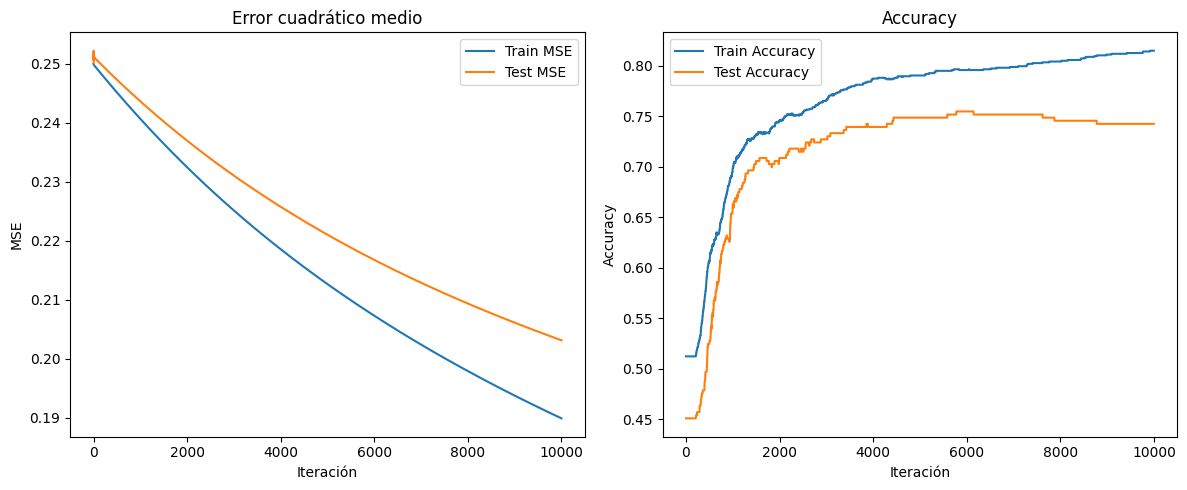

In [134]:
plot_metrics(train_mse, train_acc, test_mse, test_acc)

## Ejercicio 4


In [ ]:
# Normalizamos los valores
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

# Parámetros del entrenamiento
alpha = 0.0001
num_it = 10000

# Inicializamos parámetros
w = np.random.randn(X_train_norm.shape[1]) * 0.0001
b = 0.0

# Listas para tracking
train_mse_list = []
train_acc_list = []
test_mse_list = []
test_acc_list = []

# Entrenamiento con datos normalizados
for it in range(num_it):
    grad_w, grad_b = gradiente(X_train_norm, y_train, w, b)

    w -= alpha * grad_w
    b -= alpha * grad_b

    train_mse, train_acc = metricas(X_train_norm, y_train, w, b)
    test_mse, test_acc = metricas(X_test_norm, y_test, w, b)

    train_mse_list.append(train_mse)
    train_acc_list.append(train_acc)
    test_mse_list.append(test_mse)
    test_acc_list.append(test_acc)

    if it % 100 == 0 or it == num_it - 1:
        print(f"Iteration {it}: Train MSE={train_mse:.4f}, Acc={train_acc:.4f} | Test MSE={test_mse:.4f}, Acc={test_acc:.4f}")

# Visualización de resultados con datos normalizados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_mse_list, label='Train MSE')
plt.plot(test_mse_list, label='Test MSE')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend()
plt.title('Error cuadrático medio (Datos normalizados)')

plt.subplot(1, 2, 2)
plt.plot(train_acc_list, label='Train Accuracy')
plt.plot(test_acc_list, label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy (Datos normalizados)')

plt.tight_layout()
plt.show()


## Ejercicio 5

In [ ]:
valores_alpha = [0.1, 0.01, 0.0001, 0.000001, 0.00000001]
alpha_mse_lists = []

for alpha in valores_alpha:
    alpha_mse_list = []
    w = np.random.randn(X_train_norm.shape[1]) * 0.0001
    b = 0.0
    for it in range(num_it):
        grad_w, grad_b = gradiente(X_train, y_train, w, b)

        w -= alpha * grad_w
        b -= alpha * grad_b

        test_mse, test_acc = metricas(X_test, y_test, w, b)

        alpha_mse_list.append(test_mse)

        if it % 100 == 0 or it == num_it - 1:
            print(f"Iteration {it}: Train MSE={train_mse:.4f}, Acc={train_acc:.4f} | Test MSE={test_mse:.4f}, Acc={test_acc:.4f}")

    alpha_mse_lists.append(alpha_mse_list)

# Graficar la convergencia del MSE para cada valor de alpha
plt.figure(figsize=(10, 6))
for i, alpha in enumerate(valores_alpha):
    plt.plot(alpha_mse_lists[i], label=f'α = {alpha}')

plt.xlabel('Iteración')
plt.ylabel('MSE')
plt.title('Convergencia del MSE para diferentes valores de α')
plt.legend()
plt.grid(True)
plt.show()
